# **ECUACIONES DIFERENCIALES ORDINARIAS - METODOS DE RUNGE KUTTA**

El presente documento esta orientado al desarrollo de los metodos y solucion del siguiente ejercicio sobre ecuaciones diferenciales ordinarias

#**Ejercicio**

Para la siguiente ecuacion diferencial ordinaria:

>$ y' = -2x + yx$

>$y(1) = -3; 1 \leq x \leq 2$

Realice un programa en Python empleando **Google Colab** que:
* Resuelva la EDO empleando los siguientes métodos:

>- Runge – Kutta 1er orden – Euler
>- Runge – Kutta 2º orden
>- Runge – Kutta 4º orden

* Genere una gráfica que incluya las soluciones por cada uno de los métodos, con tamaños de paso $ℎ = 0.5$.

# **Metodos de Runge-Kutta**



Los metodos de Runge - kutta tienen la forma generalizada

$$ y_{i+1} = y_i + \phi(x_i, y_i, h) h$$

donde $\phi$ se conoce como la funcion incremento y se expresa como

$$ \phi = a_1k_1 +  a_2k_2 + ... + a_nk_n $$

donde las $a$ son constantes y las $ k $ son

$ k_1 = f(x_i, y_i) $

$k_2 = f(x_i + p_1 h, y_i + q_{11} k_1 h)$

$k_3 = f(x_i + p_2 h, y_i + q_{21} k_1 h + q_{22} k_2 h) $

$.$

$.$

$.$

$k_n = f(x_i + p_{n-1}h, y_i + q_{n-1, 1} k_2 h + ... + q_{n-1, n-1} k_{n-1} h)$

donde las $p$ y las $q$ son constantes (Chapra, R. P. y P. Canale, R. 2007. pp. 741)



##**Metodo de Runge-Kutta de 1er Orden**

Para la aproximacion de primer orden del metodo de Runge-Kutta se tiene:

$ k_1 = f(x_i, y_i) $

$ \phi = a_1k_1$

si $a_1 = 1$

entonces

$$y_{i+1} = y_i + f(x_i, y_i) h$$

La cual es la misma formula del metodo de *euler*. (Chapra, R. P. y P. Canale, R. 2007. pp. 741)


##**Metodo de Runge-Kutta de 2do orden**

Para la aproximacion de segundo orden del metodo de Runge-Kutta se tiene:

$ k_1 = f(x_i, y_i) $

$ k_2 = f(x_i + p_i h, y_i + q_{11} k_1 h) $

$ \phi = a_1k_1 + a_2k_2$

Siguiendo los procedimientos de (Chapra, R. P. y P. Canale, R. 2007. pp. 742) se obtienen las siguientes formulas para $a_1$, $p_1$ y $q_11$

$a_1 = 1 - a_2$

$ p_1 = q_{11} = \dfrac{1}{2a_2} $

Debido a que podemos elegir un número infinito de valores para a2, hay un número infinito de métodos RK de segundo orden. A continuacion se presenta de manera resumida la formula para algunos de ellos:

**metodo Heun con un solo corrector** (Chapra, R. P. y P. Canale, R. 2007. pp. 743)

$a_2 = 2$, entonces

$$y_{i+1} = y_i + \left ( \dfrac{1}{2}k_1 + \dfrac{1}{2}k_2  \right ) h$$

**metodo del punto medio** (Chapra, R. P. y P. Canale, R. 2007. pp. 743)

$a_2 = 1$, entonces

$$y_{i+1} = y_i + k_2 h$$

**metodo de Raltson** (Chapra, R. P. y P. Canale, R. 2007. pp. 744)

$a_2 = \dfrac{2}{3}$, entonces

$$y_{i+1} = y_i + \left ( \dfrac{1}{3}k_1 + \dfrac{2}{3}k_2  \right ) h$$


##**Metodo de Runge-Kutta de 4to orden**

El más popular de los métodos RK es el de cuarto orden. Como en el caso de los procedimientos
de segundo orden, hay un número infinito de versiones. La siguiente, es la forma comúnmente usada y, por lo tanto, le llamamos *método clásico RK de cuarto orden* (Chapra, R. P. y P. Canale, R. 2007. pp. 746):

$$ y_{i+1} = y_i + \dfrac{1}{6}(k_1 + 2k_2 + 2 k_3 + k_4) h $$

donde

>$ k_1 = f(x_i, y_i) $

>$ k_2 = f \left ( x_i + \dfrac{1}{2} h, y_i + \dfrac{1}{2} k_1 h \right ) $

>$ k_3 = f \left ( x_i + \dfrac{1}{2} h, y_i + \dfrac{1}{2} k_2 h \right ) $

>$ k_4 = f(x_i + h, y_i + k_3 h)$



#**Metodos de Runge Kutta en python**

A continuación se presenta el desarrollo de los metodos de Runge-Kutta mediante codigo de python:

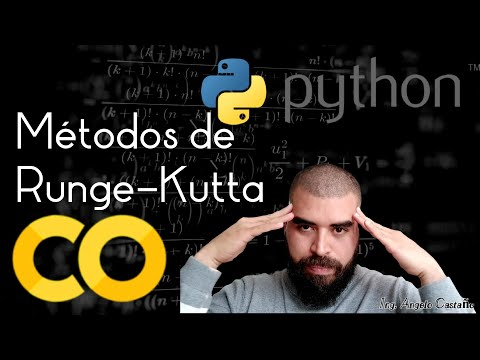

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('JnXSrM3MaLo', width=1200, height=450, allow_autoplay=True, autoplay = 1, loop = 1, mute=1)
#elimina esta seccion una ves termines de editar el documento

## **Importar funciones**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from math import *
from tabulate import tabulate

##**Funcion Runge-Kutta**

In [ ]:
#metodo de Runge - Kutta de primer orden

def RK1(xi, yi, xf, h):
  n = (xf - xi)/h                                     #cantidad de intervalos
  x = np.linspace(xi, xf, int(n+1))                   #valores de x
  yf=[]                                               #aproximacion de la integral de f'x
  fi = []                                             #derivada f'x
  k1v = []                                            #vector de k1
  yf.append(yi)
  er = []
  er.append("--")
  k1v.append("--")

  for i in range (int(n)):
    k1 = f1(x[i], yf[i])
    yf.append(yf[i] + (k1)*h)
    er.append(abs((yf[i+1] - yf[i])*100/yf[i]))
    k1v.append(k1)

  return (x, yf, k1v, er)

#-------------------------------------------------------------------------------
#metodo de Runge - Kutta de segundo orden

def RK2(xi, yi, xf, h):
  n = (xf - xi)/h                                     #cantidad de intervalos
  x = np.linspace(xi, xf, int(n+1))                   #valores de x
  yf=[]                                               #aproximacion de la integral de f'x
  fi = []                                             #derivada f'x
  k1v = []                                            #vector de k1
  k2v = []                                            #vector de k2
  yf.append(yi)
  er = []
  er.append("--")
  k1v.append("--")
  k2v.append("--")
  #a2 = 1/2                                            #Valor a2 equivalente al Metodo Heun
  #a2 = 1                                             #Valor a2 equivalente al Metodo del punto medio
  a2 = 2/3                                           #Valor a2 equivalente al Metodo de Ralston
  a1 = 1 - a2
  p1 = 1/(2*a2)
  q11 = 1/(2*a2)

  for i in range (int(n)):
    k1 = f1(x[i], yf[i])
    k2 = f1(x[i] + p1*h, yf[i] + q11*k1*h)
    yf.append(yf[i] + (a1*k1 + a2*k2)*h)
    er.append(abs((yf[i+1] - yf[i])*100/yf[i]))
    k1v.append(k1)
    k2v.append(k2)

  return (x, yf, k1v, k2v, er)

#-------------------------------------------------------------------------------
#metodo de Runge - Kutta de cuarto orden

def RK4(xi, yi, xf, h):
  n = (xf - xi)/h                                     #cantidad de intervalos
  x = np.linspace(xi, xf, int(n+1))                   #valores de x
  yf=[]                                               #aproximacion de la integral de f'x
  fi = []                                             #derivada f'x
  k1v = []                                            #vector de k1
  k2v = []                                            #vector de k2
  k3v = []                                            #vector de k3
  k4v = []                                            #vector de k4
  yf.append(yi)
  er = []
  er.append("--")
  k1v.append("--")
  k2v.append("--")
  k3v.append("--")
  k4v.append("--")

  for i in range (int(n)):
    k1 = f1(x[i], yf[i])
    k2 = f1(x[i] + (1/2)*h, yf[i] + (1/2)*k1*h)
    k3 = f1(x[i] + (1/2)*h, yf[i] + (1/2)*k2*h)
    k4 = f1(x[i] + h, yf[i] + k3*h)
    yf.append(yf[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h)
    er.append(abs((yf[i+1] - yf[i])*100/yf[i]))
    k1v.append(k1)
    k2v.append(k2)
    k3v.append(k3)
    k4v.append(k4)

  return (x, yf, k1v, k2v, k3v, k4v, er)


# **Solucion del ejercicio**

## **Ecuacion diferencial $y' = f(x, y)$**

In [ ]:
#Funcion ecuacion diferencial de primer orden f(x,y)
def f1(x, y):
  dvy1 = -2*x + y*x
  return (dvy1)

def f11(x, y):
  dvy1 = -2 + (-2*x + y*x)*x + y
  return (dvy1)

def f12(x, y):
  dvy1 = -2 + (-2*x + y*x)*x + y
  return (dvy1)

#Solucion analitica
def y(x):
  fx = np.exp((2/3)*x**3 + 0.9996)
  return (fx)

##**Valores iniciales**

In [ ]:
#Valores iniciales
xi = 1                                #Valor inicial de 'x'
yi = -3                               #Valor inicial de 'y'

#Limite superior de integracion
xf = 2                                #Valor final de 'x'

#Tamaño de Paso o incremento
h1 = 0.1                              #Tamaño de paso 1

##**Llamada de la funcion**

In [ ]:
#Runge - Kutta de 1er orden
x1_RK1, yf1_RK1, k11_RK1, e1_RK1 = RK1(xi, yi, xf, h1)

#Runge - Kutta de 2do orden
x1_RK2, yf1_RK2, k11_RK2, k12_RK2, e1_RK2 = RK2(xi, yi, xf, h1)

#Runge - Kutta de 4to orden
x1, yf1, k11, k12, k13, k14, e1 = RK4(xi, yi, xf, h1)

## **Tabla de datos de la solucion numerica**

In [ ]:
#Runge-Kutta de 1er orden

print("RUNGE - KUTTA 1er orden")
print(" ")

#Tabla 1
n1 = len(x1)
tabla1 = []                         #tabla de datos
#Llenar la tabla de datos
for i in range(n1):
  tabla1.append([x1_RK1[i], yf1_RK1[i], k11_RK1[i], e1_RK1[i]])

print("tabla de datos 1")
print(" ")
print(tabulate(tabla1, headers=['x', 'y', 'k1', 'er(%)']))
print(" ")
print(" ")

#------------------------------------------------------------------------------
#Runge-Kutta de 2do orden
print(" ")
print(" ")
print("RUNGE - KUTTA 2do orden")
print(" ")

#Tabla 1
n1 = len(x1)
tabla1 = []                         #tabla de datos
#Llenar la tabla de datos
for i in range(n1):
  tabla1.append([x1_RK2[i], yf1_RK2[i], k11_RK2[i], k12_RK2[i], e1_RK2[i]])

print("tabla de datos 1")
print(" ")
print(tabulate(tabla1, headers=['x', 'y', 'k1', 'k2', 'er(%)']))
print(" ")
print(" ")

#------------------------------------------------------------------------------
#Runge-Kutta de 4to orden
print(" ")
print(" ")
print("RUNGE - KUTTA 4to orden")
print(" ")

#Tabla 1
n1 = len(x1)
tabla1 = []                         #tabla de datos
#Llenar la tabla de datos
for i in range(n1):
  tabla1.append([x1[i], yf1[i], k11[i], k12[i], k13[i], k14[i], e1[i]])

print("tabla de datos 1")
print(" ")
print(tabulate(tabla1, headers=['x', 'y', 'k1', 'k2', 'k3', 'k4', 'er(%)']))
print(" ")
print(" ")

RUNGE - KUTTA 1er orden
 
tabla de datos 1
 
  x          y  k1                   er(%)
---  ---------  -------------------  ------------------
1     -3        --                   --
1.1   -3.5      -5.0                 16.666666666666668
1.2   -4.105    -6.050000000000001   17.2857142857143
1.3   -4.8376   -7.3260000000000005  17.84652862362971
1.4   -5.72649  -8.88888             18.3745659004465
1.5   -6.8082   -10.817083199999999  18.88955883606147
1.6   -8.12943  -13.212294479999999  19.406453426125637
1.7   -9.75013  -16.2070812288       19.936317387380814
1.8  -11.7477   -19.975227614496     20.487131600500653
1.9  -14.2222   -24.74578197419328   21.0644409404714
2    -17.3045   -30.822246214522963  21.67187262771651
 
 
 
 
RUNGE - KUTTA 2do orden
 
tabla de datos 1
 
  x          y  k1                   k2                   er(%)
---  ---------  -------------------  -------------------  ------------------
1     -3        --                   --                   --
1.1   -3.5

## **Solucion analitica**

**Usando Libreria Sympy**

In [ ]:
import sympy
from sympy import *

#usamos el procedimiento de:
#https://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/

# Resolviendo ecuación diferencial
# defino las incognitas
xs = sympy.Symbol('x')
ys = sympy.Function('y')
e = sympy.Symbol('e')

# expreso la ecuacion
fs = -2*xs + ys(xs)*xs
sympy.Eq(ys(xs).diff(xs), fs)

Eq(Derivative(y(x), x), x*y(x) - 2*x)

In [ ]:
# Condición inicial
ics = {ys(xi): yi}

# Resolviendo la ecuación
edo_sol = sympy.dsolve(ys(xs).diff(xs) - fs)
edo_sol

Eq(y(x), C1*exp(x**2/2) + 2)

In [ ]:
#imprimimos la solucion, para copiar la expresion y usarla mas adelante
print(edo_sol)

Eq(y(x), C1*exp(x**2/2) + 2)


In [ ]:
#Reemplazamos los valores de la condición inicial en nuestra ecuación.

C_eq = sympy.Eq(edo_sol.lhs.subs(xs, xi).subs(ics), edo_sol.rhs.subs(xs, xi))
C_eq

Eq(-3, C1*exp(1/2) + 2)

In [ ]:
sympy.solve(C_eq)

[-5*exp(-1/2)]

In [ ]:
#Definimos la funcion con la solución analitica
def yanalitic(x, C1):
  ysolv=C1*exp(x**2/2) + 2
  return (ysolv)

#intervalo de evaluacion de la solución analitica
h4 = h1
n4 = (xf - xi)/h4                                       #cantidad de intervalos
x4 = np.linspace(xi, xf, int(n4+1))                     #valores de x
#yf4 = yanalitic(x4, 2)
#x4 = np.array([1, 2])
yf4 = []
for i in range(len(x4)):
  yf4.append(yanalitic(x4[i], -5*np.exp(-1/2)))


In [ ]:
#Calculo del error de la aproximacion

yf4abs = yf4[len(yf4) - 1]

er11 = abs((yf1_RK1[len(yf1_RK1) - 1] - yf4abs)/yf4abs)*100
er21 = abs((yf1_RK2[len(yf1_RK2) - 1] - yf4abs)/yf4abs)*100
er31 = abs((yf1[len(yf1) - 1] - yf4abs)/yf4abs)*100

print(er11, er21, er31)

15.2093205876263 0.785826275215801 0.000852707659023665


##**Grafica de la funcion $y = f(x)$**

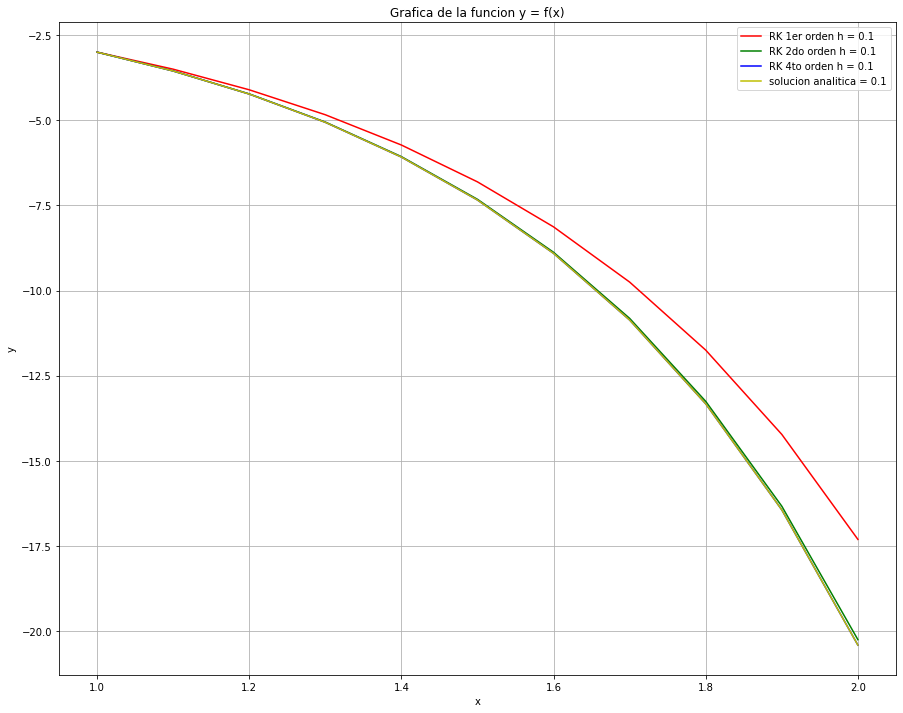

In [ ]:
#------------------------------------------------------------------------------
#Runge-Kutta de 2do, 3er y 4to orden
plt.figure(figsize=(15, 12))
plt.plot(x1_RK1, yf1_RK1, '-r', label = "RK 1er orden h = " + str(h1))
plt.plot(x1_RK2, yf1_RK2, '-g', label = "RK 2do orden h = " + str(h1))
plt.plot(x1, yf1, '-b', label = "RK 4to orden h = " + str(h1))
plt.plot(x4, yf4, 'y', label = "solucion analitica = " + str(h4))
#plt.axis([0, 6, 0, 20])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafica de la funcion y = f(x)")
plt.legend()
plt.grid()
plt.show()


##**Referencias**

Chapra, R. P. y P. Canale, R. (2007). Métodos numéricos para ingenieros (5a. ed.). México D.F, México: McGraw-Hill Interamericana. (pp. 709-715, 719-751).